In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_excel('OnlineRetail.xls')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Add extra fields 
dataset['TotalAmount'] = dataset['Quantity'] * dataset['UnitPrice']
dataset['InvoiceYear'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceYearMonth'] = dataset['InvoiceYear'].map(str) + "-" + dataset['InvoiceMonth'].map(str)

In [4]:
## Part1. Exploring
######################
####################### Explore In General ###############
dataset.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount,InvoiceYear,InvoiceMonth
count,65535.000000,65535.000000,40218.000000,65535.000000,65535.000000,65535.000000
mean,8.363119,5.856143,15384.033517,17.129196,2010.351781,8.130404
std,413.694482,145.755953,1766.863499,457.384485,0.477530,5.252828
min,-74215.000000,0.000000,12346.000000,-77183.600000,2010.000000,1.000000
25%,1.000000,1.250000,14001.000000,3.360000,2010.000000,1.000000
50%,2.000000,2.510000,15358.000000,8.250000,2010.000000,12.000000
75%,8.000000,4.240000,17019.000000,16.870000,2011.000000,12.000000
max,74215.000000,16888.020000,18283.000000,77183.600000,2011.000000,12.000000


In [5]:
# Total number of transactions
len(dataset['InvoiceNo'].unique())

2889

In [6]:
# Number of transactions with anonymous customers 
len(dataset[dataset['CustomerID'].isnull()]['InvoiceNo'].unique())

445

In [7]:
# Total numbers of customers - +1 for null users
len(dataset['CustomerID'].unique())

1205

In [8]:
# Total profit
sum(dataset['TotalAmount'])

1122561.8799998781

In [9]:
# Get top ranked ranked customers based on the total amount
customers_amounts = dataset.groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
customers_amounts.head(20)

CustomerID
18102.0    27834.61
14646.0    27008.26
15749.0    22998.40
15061.0    22045.21
17450.0    20649.04
14156.0    17089.42
16029.0    14730.15
17511.0    10459.30
14911.0    10004.88
13089.0     9530.39
13777.0     7252.42
12415.0     7092.98
16210.0     7000.64
13798.0     6144.06
14298.0     6119.36
15311.0     6047.09
13093.0     6019.42
14733.0     5838.31
13081.0     5817.07
15769.0     5636.28
Name: TotalAmount, dtype: float64

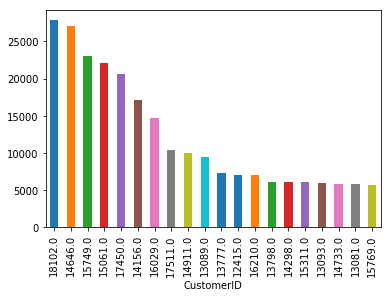

In [10]:
customers_amounts.head(20).plot.bar()

In [11]:
# Frequently sold items by quantitiy
gp_stockcode = dataset.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    8189
PACK OF 72 RETROSPOT CAKE CASES       6635
WORLD WAR 2 GLIDERS ASSTD DESIGNS     6109
HAND WARMER BABUSHKA DESIGN           4060
HEART OF WICKER SMALL                 4047
JUMBO BAG RED RETROSPOT               3993
SMALL POPCORN HOLDER                  3971
MINI PAINT SET VINTAGE                3615
ASSORTED COLOUR BIRD ORNAMENT         3374
FAIRY CAKE FLANNEL ASSORTED COLOUR    3365
GROW A FLYTRAP OR SUNFLOWER IN TIN    2953
PACK OF 12 LONDON TISSUES             2950
BROCADE RING PURSE                    2854
CHILLI LIGHTS                         2786
CHARLOTTE BAG SUKI DESIGN             2722
ANTIQUE SILVER TEA GLASS ETCHED       2701
GIN + TONIC DIET METAL SIGN           2694
REGENCY CAKESTAND 3 TIER              2689
RED  HARMONICA IN BOX                 2669
JAM MAKING SET PRINTED                2654
Name: Quantity, dtype: int64

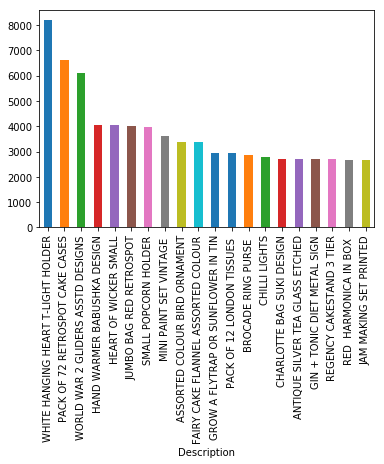

In [12]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [13]:
# Frequently sold items by total amount
gp_stockcode_frq_amount = gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_amount.head(20)

Description
REGENCY CAKESTAND 3 TIER               35158.66
DOTCOM POSTAGE                         34177.86
WHITE HANGING HEART T-LIGHT HOLDER     23191.54
CHILLI LIGHTS                          12515.21
RED WOOLLY HOTTIE WHITE HEART.          9400.87
PAPER CHAIN KIT 50'S CHRISTMAS          9348.47
WHITE SKULL HOT WATER BOTTLE            8889.81
HEART OF WICKER LARGE                   8175.29
HOT WATER BOTTLE TEA AND SYMPATHY       8104.58
CHOCOLATE HOT WATER BOTTLE              8048.47
WOOD BLACK BOARD ANT WHITE FINISH       7794.84
POSTAGE                                 7731.29
HEART OF WICKER SMALL                   7506.07
JUMBO BAG RED RETROSPOT                 7400.62
FAIRY CAKE FLANNEL ASSORTED COLOUR      7357.66
KNITTED UNION FLAG HOT WATER BOTTLE     7323.47
VINTAGE UNION JACK MEMOBOARD            7149.36
BLACK RECORD COVER FRAME                7077.65
SCOTTIE DOG HOT WATER BOTTLE            6613.44
ROTATING SILVER ANGELS T-LIGHT HLDR     6552.02
Name: TotalAmount, dtype: fl

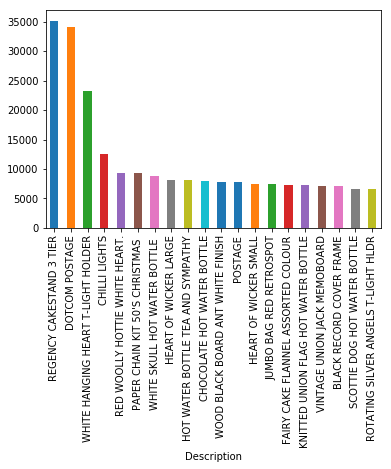

In [14]:
gp_stockcode_frq_amount.head(20).plot.bar()

In [15]:
# Explore by month
gp_month = dataset.sort_values('InvoiceDate').groupby(['InvoiceYear', 'InvoiceMonth'])

In [16]:
# Month number of invoices
gp_month_invoices = gp_month['InvoiceNo'].unique().agg(np.size)
gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              2025
2011         1                864
Name: InvoiceNo, dtype: int64

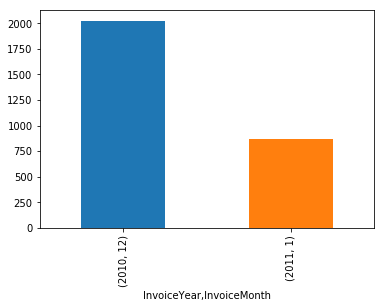

In [17]:
gp_month_invoices.plot.bar()

In [18]:
# Month total amounts
gp_month_frq_amount= gp_month['TotalAmount'].agg(np.sum)
gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12              748957.02
2011         1               373604.86
Name: TotalAmount, dtype: float64

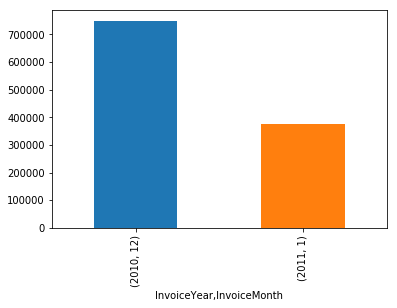

In [19]:
gp_month_frq_amount.plot.bar()

In [20]:
####################### Explore By Countries ###############
gp_country = dataset.groupby('Country')
# Order countries by total amount
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom     965313.56
EIRE                29037.42
Netherlands         27200.86
Germany             22237.81
France              21773.33
Australia            9638.13
Spain                8864.82
Japan                7595.27
Portugal             5694.30
Switzerland          4909.55
Norway               3787.12
Sweden               3153.86
Belgium              2640.52
Italy                2395.51
Cyprus               2138.32
Lithuania            1661.06
Denmark              1281.50
Finland               892.80
Poland                861.38
Iceland               711.79
Channel Islands       363.53
Austria               257.04
Israel                152.40
Bahrain                 0.00
Name: TotalAmount, dtype: float64

In [21]:
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom     2657
Germany              64
France               50
EIRE                 28
Australia            12
Spain                12
Portugal             12
Belgium              10
Netherlands           6
Italy                 5
Sweden                5
Lithuania             4
Japan                 4
Switzerland           4
Cyprus                2
Austria               2
Bahrain               2
Poland                2
Norway                2
Israel                2
Denmark               1
Channel Islands       1
Finland               1
Iceland               1
Name: InvoiceNo, dtype: int64

In [22]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom     1088
Germany              31
France               30
Australia             8
Spain                 8
Portugal              7
Belgium               5
Italy                 4
EIRE                  4
Japan                 3
Switzerland           3
Austria               2
Cyprus                2
Sweden                2
Israel                2
Netherlands           2
Poland                1
Finland               1
Denmark               1
Lithuania             1
Channel Islands       1
Bahrain               1
Norway                1
Iceland               1
Name: CustomerID, dtype: int64

In [23]:
# Work on undefined customers
gp_country_null = dataset[dataset['CustomerID'].isnull()].groupby('Country')
# Order countries by total amount [For the undefined users]
gp_country_null['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom    242253.50
EIRE                1189.38
Israel               379.84
Bahrain                0.00
Name: TotalAmount, dtype: float64

In [24]:
# Order countries by number of invoices [For the undefined users]
gp_country_null['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom    438
EIRE                4
Bahrain             2
Israel              1
Name: InvoiceNo, dtype: int64

In [25]:
# Explore more info about United Kingdom invoices because it has the max total amount
# Get United Kingdom top ranked customers based on the total amount
uk_customers_amounts = dataset[dataset['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
18102.0    27834.61
15749.0    22998.40
15061.0    22045.21
17450.0    20649.04
16029.0    14730.15
17511.0    10459.30
13089.0     9530.39
13777.0     7252.42
16210.0     7000.64
13798.0     6144.06
14298.0     6119.36
15311.0     6047.09
13093.0     6019.42
14733.0     5838.31
13081.0     5817.07
15769.0     5636.28
13694.0     5495.92
17850.0     5391.21
12748.0     4596.45
14680.0     4315.91
Name: TotalAmount, dtype: float64

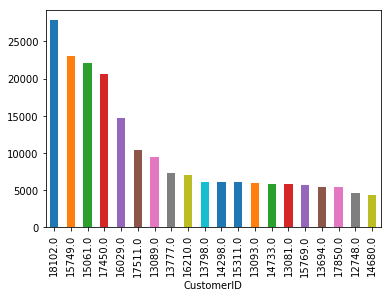

In [26]:
uk_customers_amounts.head(20).plot.bar()

In [27]:
# United Kingdom frequently sold items by quantitiy
uk_gp_stockcode = dataset[dataset['Country']=='United Kingdom'].groupby('Description')
uk_gp_stockcode_frq_quantitiy = uk_gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_quantitiy.head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    7826
WORLD WAR 2 GLIDERS ASSTD DESIGNS     5389
HEART OF WICKER SMALL                 4044
PACK OF 72 RETROSPOT CAKE CASES       3947
HAND WARMER BABUSHKA DESIGN           3868
SMALL POPCORN HOLDER                  3687
JUMBO BAG RED RETROSPOT               3623
FAIRY CAKE FLANNEL ASSORTED COLOUR    3329
ASSORTED COLOUR BIRD ORNAMENT         3166
GROW A FLYTRAP OR SUNFLOWER IN TIN    2905
PACK OF 12 LONDON TISSUES             2830
BROCADE RING PURSE                    2818
CHILLI LIGHTS                         2778
MINI PAINT SET VINTAGE                2715
ANTIQUE SILVER TEA GLASS ETCHED       2701
GIN + TONIC DIET METAL SIGN           2682
HEART OF WICKER LARGE                 2615
PAPER CHAIN KIT 50'S CHRISTMAS        2465
CREAM HEART CARD HOLDER               2362
CHARLOTTE BAG SUKI DESIGN             2340
Name: Quantity, dtype: int64

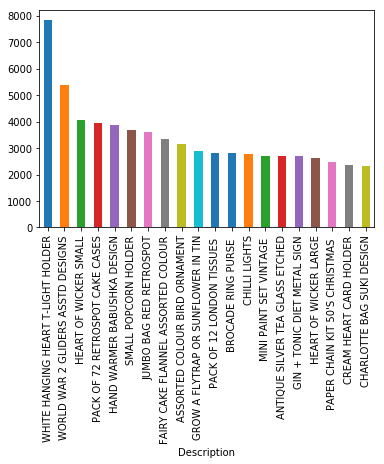

In [28]:
uk_gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [29]:
# Frequently sold items by total amount
uk_gp_stockcode_frq_amount = uk_gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_amount.head(20)

Description
DOTCOM POSTAGE                         34177.86
REGENCY CAKESTAND 3 TIER               30550.81
WHITE HANGING HEART T-LIGHT HOLDER     22248.69
CHILLI LIGHTS                          12475.61
RED WOOLLY HOTTIE WHITE HEART.          9355.87
PAPER CHAIN KIT 50'S CHRISTMAS          9313.07
WHITE SKULL HOT WATER BOTTLE            8867.31
HEART OF WICKER LARGE                   8175.29
HOT WATER BOTTLE TEA AND SYMPATHY       7946.58
CHOCOLATE HOT WATER BOTTLE              7825.72
WOOD BLACK BOARD ANT WHITE FINISH       7728.24
HEART OF WICKER SMALL                   7501.12
KNITTED UNION FLAG HOT WATER BOTTLE     7308.47
FAIRY CAKE FLANNEL ASSORTED COLOUR      7265.86
VINTAGE UNION JACK MEMOBOARD            7149.36
BLACK RECORD COVER FRAME                6972.65
JUMBO BAG RED RETROSPOT                 6739.12
SCOTTIE DOG HOT WATER BOTTLE            6519.39
ROTATING SILVER ANGELS T-LIGHT HLDR     6460.22
CREAM HEART CARD HOLDER                 6071.48
Name: TotalAmount, dtype: fl

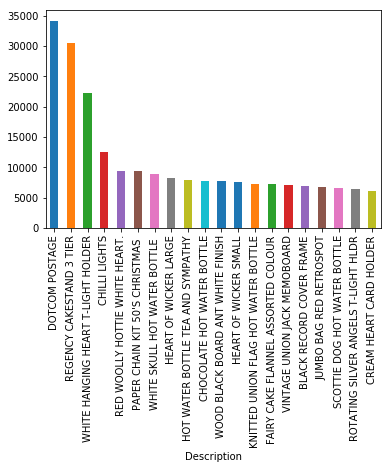

In [30]:
uk_gp_stockcode_frq_amount.head(20).plot.bar()

In [31]:
# Explore United Kingdom by month
uk_gp_month = dataset[dataset['Country']=='United Kingdom'].groupby(['InvoiceYear', 'InvoiceMonth'])
# United Kingdom By Month number of invoices
uk_gp_month_invoices = uk_gp_month['InvoiceNo'].unique().agg(np.size)
uk_gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              1885
2011         1                772
Name: InvoiceNo, dtype: int64

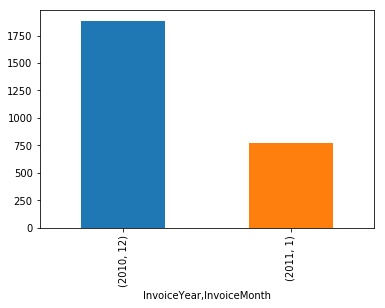

In [32]:
uk_gp_month_invoices.plot.bar()

In [33]:
# United Kingdom By Month total amounts
uk_gp_month_frq_amount= uk_gp_month['TotalAmount'].agg(np.sum)
uk_gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12              676742.62
2011         1               288570.94
Name: TotalAmount, dtype: float64

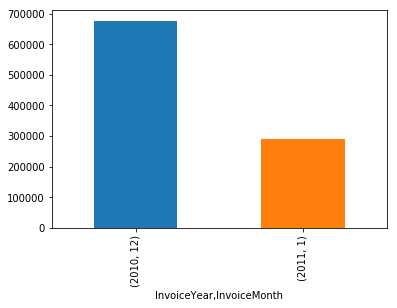

In [34]:
uk_gp_month_frq_amount.plot.bar()